In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import random
from pathlib import Path

In [2]:
base_path = 'data/Dataset_Signature_Final'
genuine_path = os.path.join(base_path, 'real')
forged_path = os.path.join(base_path, 'forge')

In [3]:
print(f"Genuine path exists: {os.path.exists(genuine_path)}")
print(f"Forged path exists: {os.path.exists(forged_path)}")

Genuine path exists: True
Forged path exists: True


In [4]:
# Function to get all image files from a directory
def get_image_files(directory):
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist!")
        return []
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff']
    image_files = []
    
    for root, _, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))
    
    return image_files

# Get all image files
genuine_images = get_image_files(genuine_path)
forged_images = get_image_files(forged_path)

print(f"Number of genuine signature images: {len(genuine_images)}")
print(f"Number of forged signature images: {len(forged_images)}")

Number of genuine signature images: 232
Number of forged signature images: 310


In [5]:
# Simplify the data loading process for the actual folder structure
genuine_data = []
for img_path in genuine_images:
    base_name = os.path.basename(img_path)
    genuine_data.append({
        'filename': base_name,
        'path': img_path,
        'type': 'genuine'
    })

forged_data = []
for img_path in forged_images:
    base_name = os.path.basename(img_path)
    forged_data.append({
        'filename': base_name,
        'path': img_path,
        'type': 'forged'
    })

In [6]:
# Create dataframes
genuine_df = pd.DataFrame(genuine_data)
forged_df = pd.DataFrame(forged_data)

# Combine the dataframes
all_signatures_df = pd.concat([genuine_df, forged_df], ignore_index=True)

# Display the first few rows
print("\nSample of signature data:")
display(all_signatures_df.head())

# Basic statistics
print("\nBasic statistics:")
print(f"Total number of signatures: {len(all_signatures_df)}")
print(f"Number of genuine signatures: {len(genuine_df)}")
print(f"Number of forged signatures: {len(forged_df)}")


Sample of signature data:


,filename,path,type
0,07102071.png,data/Dataset_Signature_Final/real/07102071.png,genuine
1,08403084.png,data/Dataset_Signature_Final/real/08403084.png,genuine
2,09301093.png,data/Dataset_Signature_Final/real/09301093.png,genuine
3,00102001.png,data/Dataset_Signature_Final/real/00102001.png,genuine
4,00301003.png,data/Dataset_Signature_Final/real/00301003.png,genuine



Basic statistics:
Total number of signatures: 542
Number of genuine signatures: 232
Number of forged signatures: 310



Sample Signature Images:


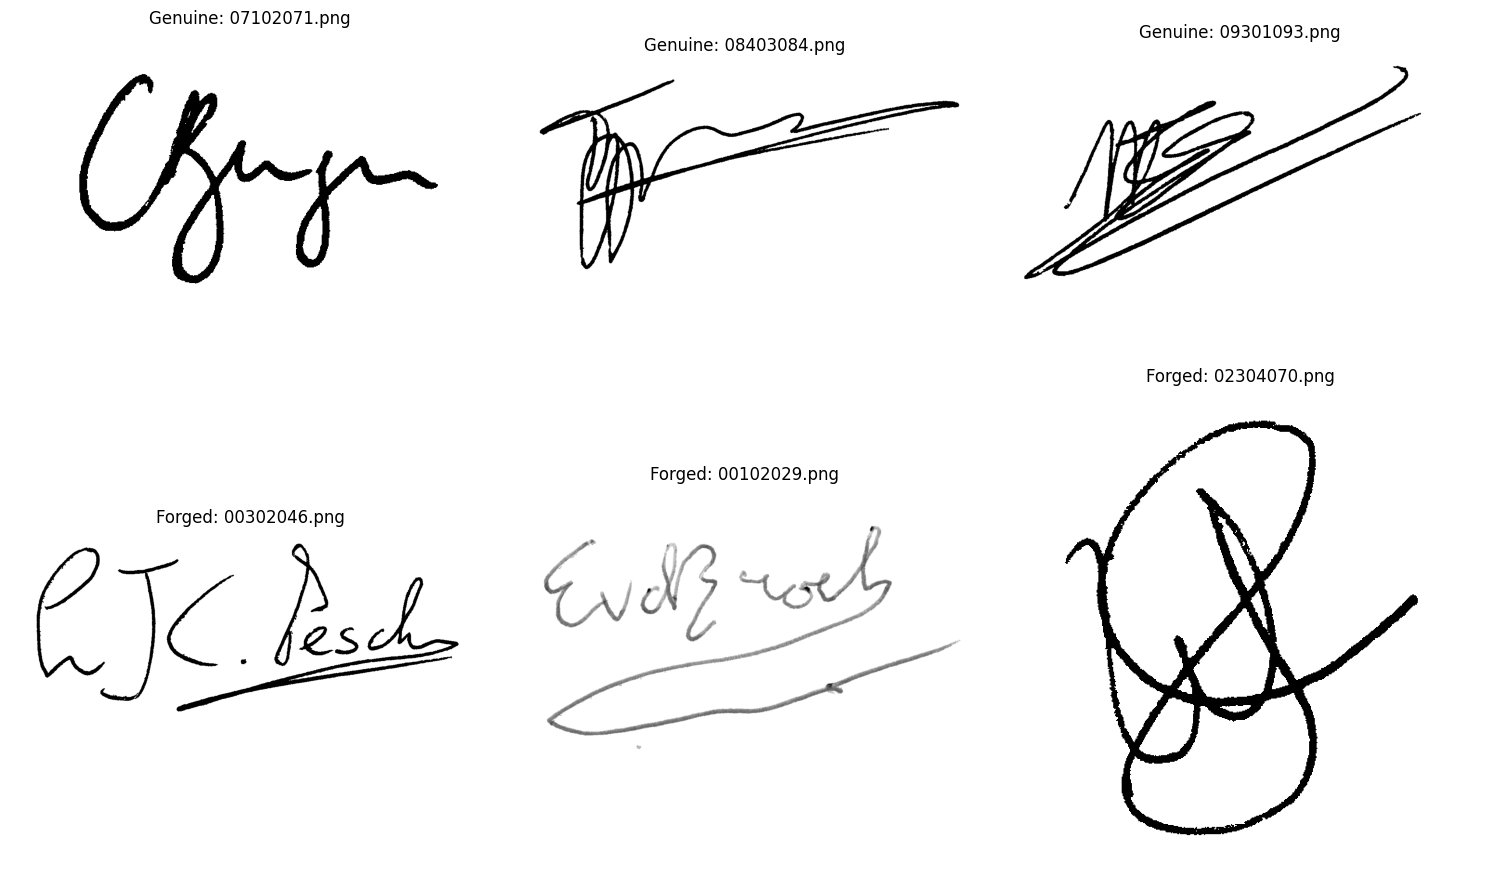

In [7]:
# Display sample images from both genuine and forged categories
def display_sample_images(genuine_df, forged_df, num_samples=3):
    plt.figure(figsize=(15, 10))
    
    # Display genuine signatures
    for i in range(min(num_samples, len(genuine_df))):
        img_path = genuine_df.iloc[i]['path']
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, num_samples, i+1)
            plt.imshow(img)
            plt.title(f"Genuine: {genuine_df.iloc[i]['filename']}")
            plt.axis('off')
    
    # Display forged signatures
    for i in range(min(num_samples, len(forged_df))):
        img_path = forged_df.iloc[i]['path']
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, num_samples, num_samples+i+1)
            plt.imshow(img)
            plt.title(f"Forged: {forged_df.iloc[i]['filename']}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
print("\nSample Signature Images:")
display_sample_images(genuine_df, forged_df)

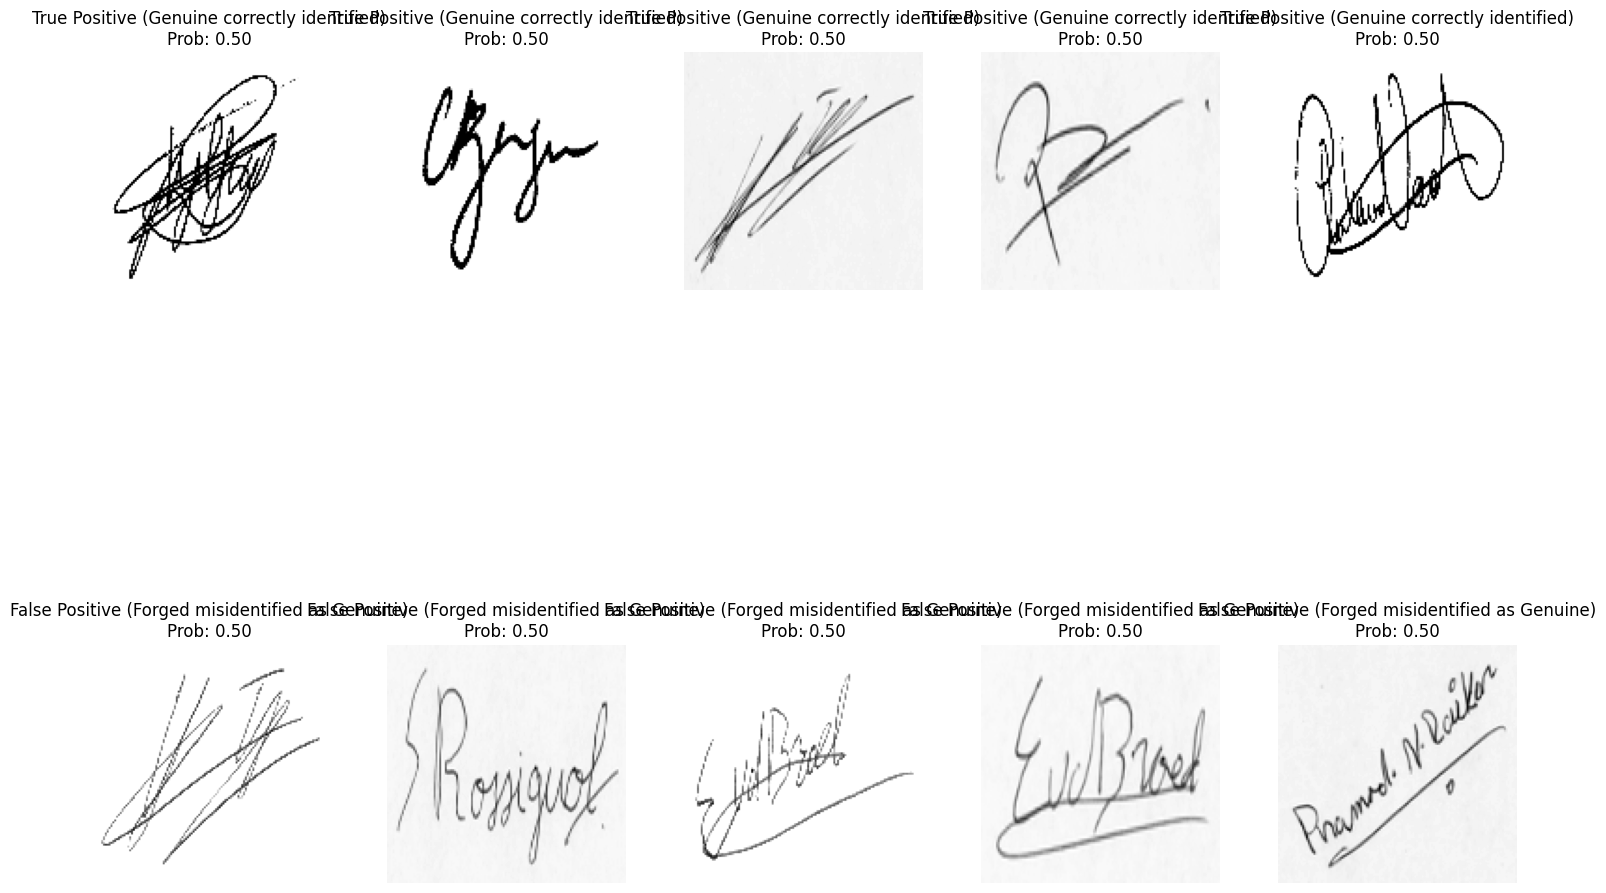

In [ ]:
# Step 15: Display some example predictions
def plot_example_predictions(X, y_true, y_pred, num_examples=5):
    # Find some examples of each category (TP, TN, FP, FN)
    true_positive = np.where((y_true == 1) & (y_pred == 1))[0]
    true_negative = np.where((y_true == 0) & (y_pred == 0))[0]
    false_positive = np.where((y_true == 0) & (y_pred == 1))[0]
    false_negative = np.where((y_true == 1) & (y_pred == 0))[0]
    
    categories = [
        ('True Positive (Genuine correctly identified)', true_positive),
        ('True Negative (Forged correctly identified)', true_negative),
        ('False Positive (Forged misidentified as Genuine)', false_positive),
        ('False Negative (Genuine misidentified as Forged)', false_negative)
    ]
    
    plt.figure(figsize=(15, 12))
    
    for i, (title, indices) in enumerate(categories):
        if len(indices) > 0:
            for j in range(min(num_examples, len(indices))):
                if j < len(indices):
                    idx = indices[j]
                    plt.subplot(4, num_examples, i*num_examples + j + 1)
                    plt.imshow(X[idx].squeeze(), cmap='gray')
                    plt.title(f"{title}\nProb: {y_pred_prob[idx][0]:.2f}")
                    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot example predictions
plot_example_predictions(X_test, y_test, y_pred)
